# Exploratory Data Analysis of NBA Players 2020-2021

*Submitted in partial fulfillment of the requirements for the degree of Master of Analytics, RMIT University, Melbourne*
***

<p style="text-align:center;">
    <img src="images/cover_basketball.webp" alt="basketbal-analytics" title="Basketball Analytics" width="700"><br>
    <center><i>Fig. 1: Basketball Analytics [source: <a href="https://www.datanami.com/2020/12/14/why-ai-is-a-slam-dunk-for-the-nba/">Alex Woodie / Datanami]</a></i></center>
</p>

# Table of Contents

* [1 Introduction](#Introduction)
	* [1.1 Abstract](#Abstract)
	* [1.2 Data Description](#Data-Description)
* [2 Data Preparation](#Data-Preparation)
	* [2.1 Load Dataset](#Load-Dataset)
	* [2.2 Overview & Summary Statistics](#Overview-&-Summary-Statistics)
* [3 Check for Data Entry Errors](#Check-for-Data-Entry-Errors)
	* [3.1 Typos](#Typos)
	* [3.2 Redundant whitespaces](#Redundant-whitespaces)
	* [3.3 Physically impossible/false values](#Physically-impossible/false-values)
	* [3.4 Missing values](#Missing-values)
* [4 Write Cleaned File](#Write-Cleaned-File)
* [5 Data Exploration](#Data-Exploration)
	* [5.1 Analysis of Players' Total Points](#Analysis-of-Players'-Total-Points)
	* [5.2 Check for 3P, 3PA and 3P% columns](#Check-for-3P,-3PA-and-3P%-columns)
	* [5.3 Analysis of Total Points vs other features](#Analysis-of-Total-Points-vs-other-features)
* [6 References](#References)

## Introduction

### Abstract

The aim of this report is to examine the dataset for 492 NBA (National Basketball Association) players during 2020-2021 season and prepare it for further analysis by employing data cleansing methodologies. The report also explores the relationships between players’ total points and other features.

Data is examined carefully and initial steps of data cleaning are applied accordingly.

### Data Description

The data is sourced from [Basketball-Reference.com](https://www.basketball-reference.com/) and downloaded in CSV format. 

**Source**:

Basketball-Reference.com. 2021. _2020-21 NBA Season Summary_ [Data file]. Retrieved from
https://www.basketball-reference.com/leagues/NBA_2021_advanced.html

It is to be noted that  a few players appeared more than once in the data since they played for different teams in the
same season. The description of each column in this data set is given below :

- **Rk** – Rank.
- **Pos** – Position, the value can be only PF, PG, C, SG, SF, PG-SG, or SF-PF.
- **Age** – Player’s age on February 1 of the season.
- **Tm** – Team, the value can be only MIA, MIL, NOP, SAS, PHO, MEM, TOT, BRK,
CLE, ORL, LAL, POR, TOR, CHI, WAS, UTA, SAC, CHO, NYK, DEN, LAC,
GSW, OKC, MIN, DET, DAL, IND, ATL, PHI, BOS, HOU.
- **G** – Games, the number of games played, each team has a maximum of 82 games in
a season.
- **GS** – Games Started, the number of games played as a starter.
- **MP** – Minutes Played, regardless of overtime, each game has 48 minutes.
- **FG** – Field Goals, all Field Goals including 2-Point Field Goals and 3-Point Field
Goals.
- **FGA** – Field Goal Attempts, the number of field goal attempts, including 2-Point
Field Goal Attempts and 3-Point Field Goal Attempts.
- **FG%** – Field Goal Percentage, equals to $\frac{FG}{FGA}$.
- **3P** – 3-Point Field Goals, the number of 3-Point Field Goals. A 3-point field goal
can be scored 3 points.
- **3PA** – 3-Point Field Goal Attempts, the number of 3-Point Field Goal Attempts.
- **3P%** – 3-Point Field Goal Percentage, equals to $\frac{3P}{3PA}$.
- **2P** – 2-Point Field Goals, the number of 2-Point Field Goals. A 2-point field goal
can be scored 2 points.
- **2PA** – 2-point Field Goal Attempts, the number of 2-Point Field Goal Attempts.
- **2P%** – 2-Point Field Goal Percentage, equals to $\frac{2P}{2PA}$.
- **FT** – Free Throws, the number of Free Throws, one free throw goal worth 1 point.
- **FTA** – Free Throw Attempts, the number of Free Throw Attempts.
- **FT%** – Free Throw Percentage, equals to $\frac{FT}{FTA}$.
- **ORB** – Offensive Rebounds, the number of Offensive Rebounds.
- **DRB** – Defensive Rebounds, the number of Defensive Rebounds.
- **TRB** – Total Rebounds, the number of Offensive Rebounds and Defensive Rebounds.
- **AST** – Assists, the number of Assists.
- **STL** – Steals, the number of Steals.
- **BLK** – Blocks, the number of Blocks.
- **TOV** – Turnovers, the number of Turnovers.
- **PF** – Personal Fouls, the number of Personal Fouls. The NBA allots players six
personal fouls per game; players are automatically disqualified from competition
upon incurring their sixth foul, and a referee will eject them from the game.
- **PTS** – The Total Points, including 2 points, 3 points and free throws, and the value
must be less than 2000.

## Data Preparation

### Load Dataset

In the first step, all important libraries required for data wrangling and plotting are imported.

In [1]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

Style, definition and dimension parameters for proper plotting are then setup.

In [2]:
#for better definition of plots
%config InlineBackend.figure_format = 'retina'

#to produce "ggplot" (R Package) style plots
plt.style.use("ggplot")

# set default plot dimensions
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 90

Next, options to ignore warnings and view all columns of the dataset are setup.

In [3]:
# to ignore any warnings
warnings.filterwarnings("ignore")

# to view all columns
pd.set_option('display.max_columns', None) 

The CSV dataset [`NBA_players_stats`](NBA_players_stats.csv) is then imported and loaded from local working directory using `pandas`. The first column which denotes the serial no. of players is set as an index column, as it is actually a counter rather than a feature.

In [4]:
# load dataset
NBA = pd.read_csv('dataset/NBA_players_stats.csv',sep=',', decimal='.', header = 0, index_col = 0)

### Overview & Summary Statistics

The dimensions of the loaded dataset are checked in order to confirm with the original source. There are $512$ observations (rows) and $28$ features (columns) in total.

In [5]:
# check the dimensions
NBA.shape

(512, 28)

Next, the first $5$ rows of the dataset and summary statistics are displayed.

In [6]:
# check contents of dataframe
NBA.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,0,0,NaN,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.00,1,6,0.167,0,0,NaN,0,3,3,2,0,0,0,1,20000
3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,0,1,0.00,115,186,0.618,35,79,0.443,133,161,294,69,29,20,50,63,265
4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,2,6,0.05,234,413,0.567,160,189,0.847,72,241,313,179,29,34,98,80,634
5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.36,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800


In [7]:
# get summary statistics
NBA.describe(include='all')

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,512,512,512.000000,512,512.000000,512.000000,512.000000,512.000000,512.000000,509.000000,512.000000,512.000000,479.000000,512.000000,512.000000,505.000000,512.000000,512.000000,480.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
unique,492,20,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Damian Jones,SG,NaN,BRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,117,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.025391,NaN,22.515625,10.603516,512.730469,87.326172,187.789062,0.439961,27.218750,73.910156,0.316823,60.107422,113.878906,0.501632,36.658203,47.070312,0.742929,20.808594,73.439453,94.248047,52.925781,16.050781,10.509766,28.810547,41.898438,333.275391
std,NaN,NaN,12.099932,NaN,10.762502,12.697945,374.173372,82.210894,170.428063,0.120485,29.654749,75.700355,0.140463,63.802427,116.742818,0.143022,45.406517,56.053013,0.171721,24.399771,66.360902,86.459582,60.983960,13.501952,13.058198,28.076169,31.061290,1550.220911
min,NaN,NaN,-19.000000,NaN,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,22.000000,NaN,14.000000,0.000000,147.750000,18.000000,43.000000,0.391000,3.000000,9.000000,0.285500,10.000000,22.000000,0.444000,6.000000,8.000000,0.667000,4.000000,18.750000,23.000000,9.000000,4.000000,2.000000,7.000000,14.000000,50.000000
50%,NaN,NaN,25.000000,NaN,25.000000,3.000000,497.000000,64.500000,145.000000,0.442000,17.000000,50.500000,0.349000,39.000000,75.000000,0.510000,21.000000,29.000000,0.772000,13.000000,57.500000,73.000000,35.000000,14.000000,6.000000,22.000000,39.500000,180.000000
75%,NaN,NaN,28.000000,NaN,33.000000,20.000000,814.250000,131.250000,275.000000,0.500000,45.000000,119.250000,0.394000,88.250000,171.000000,0.575000,48.000000,63.250000,0.851000,27.000000,110.000000,140.000000,69.000000,25.000000,14.000000,40.250000,64.000000,356.750000


From the summary statistics, following possible anomalies can be noted :

- $20$ unique player positions
- Min age = $-19$ and max age = $280$
- $55$ unique teams
- Observations count for **FG%**, **3P%**, **2P%**, **FT%** are different from $512$
- Maximum value for PTS is $28800$

Datatypes of all the features are checked to confirm if the numeric and categorical columns have been read correctly. Here, the **Pos** and **Tm** features are nominal categorical, **Player** is of string type and the rest are numerical features.

In [8]:
# check datatypes
NBA.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

## Check for Data Entry Errors

Potential data entry errors are checked for and rectified in the following steps.

### Typos

A frequency table for the **Pos** feature reveals that there are multiple levels with incorrect/bad names.

In [9]:
# frequency table for positions
NBA['Pos'].value_counts()

SG        117
PF        102
C          98
PG         92
SF         83
SG          3
 PG         3
C           2
PFa         1
PF          1
SF.         1
SGa         1
PG-SG       1
sg          1
Sf          1
 SG         1
SF-PF       1
pg          1
 SF         1
Pg          1
Name: Pos, dtype: int64

So, a list of the correct position names (as provided in the codebook) is created and is used to filter out all bad position names.

In [10]:
pos_list = ['PF', 'PG', 'C', 'SG', 'SF', 'PG-SG', 'SF-PF'] # list of valid Pos names

np.setdiff1d(NBA.Pos,pos_list) # check for bad Pos names

array([' PG', ' SF', ' SG', 'C ', 'PF ', 'PFa', 'PG-SG ', 'Pg', 'SF.',
       'SG ', 'SGa', 'Sf', 'pg', 'sg'], dtype=object)

Accordingly, the correct position names are imputed at proper locations. 

In [11]:
NBA.loc[NBA.Pos.isin(['SGa','sg']), 'Pos'] = 'SG'
NBA.loc[NBA.Pos.isin(['PFa']), 'Pos'] = 'PF'
NBA.loc[NBA.Pos.isin(['pg','Pg']), 'Pos'] = 'PG'
NBA.loc[NBA.Pos.isin(['SF.','Sf']), 'Pos'] = 'SF'

Same approach is followed for **Tm** feature as well and bad team names are replaced with the correct ones.

In [12]:
# frequency table for team names
NBA['Tm'].value_counts()

BRK     19
HOU     18
SAC     18
WAS     18
DAL     17
NYK     17
CHI     17
TOR     17
LAL     17
DEN     17
CLE     17
DET     17
MIN     16
ATL     16
UTA     16
ORL     16
OKC     15
LAC     15
BOS     15
MIA     15
PHO     15
CHO     14
MIL     14
NOP     14
PHI     14
MEM     14
SAS     14
IND     14
POR     14
GSW     14
TOT      9
BRK      3
 PHI     3
 IND     2
H0U      1
NyK      1
 MEM     1
IND      1
MIA      1
 WAS     1
 ORL     1
 BOS     1
GSW      1
CLE      1
DET      1
ORL      1
 SAS     1
MIL      1
 BRK     1
 NOP     1
OKC      1
SAS      1
 PHO     1
 TOT     1
MEM      1
Name: Tm, dtype: int64

In [13]:
# list of valid team names
team_list= ['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK',
'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC',
'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU']

# check for bad team names
np.setdiff1d(NBA.Tm,team_list)

array([' BOS', ' BRK', ' IND', ' MEM', ' NOP', ' ORL', ' PHI', ' PHO',
       ' SAS', ' TOT', ' WAS', 'BRK ', 'CLE ', 'DET ', 'GSW ', 'H0U',
       'IND ', 'MEM ', 'MIA ', 'MIL ', 'NyK', 'OKC ', 'ORL ', 'SAS '],
      dtype=object)

In [14]:
# replace the incorrect team names
NBA.loc[NBA.Tm == 'H0U', 'Tm'] = 'HOU'
NBA.loc[NBA.Tm == 'NyK', 'Tm'] = 'NYK'

On rechecking, it is found that there are still few position and team names having white spaces, that is making
duplicate levels. These are handled in the next step.

In [15]:
# check if bad names are fixed
print(np.setdiff1d(NBA.Pos,pos_list))
print(np.setdiff1d(NBA.Tm,team_list))

[' PG' ' SF' ' SG' 'C ' 'PF ' 'PG-SG ' 'SG ']
[' BOS' ' BRK' ' IND' ' MEM' ' NOP' ' ORL' ' PHI' ' PHO' ' SAS' ' TOT'
 ' WAS' 'BRK ' 'CLE ' 'DET ' 'GSW ' 'IND ' 'MEM ' 'MIA ' 'MIL ' 'OKC '
 'ORL ' 'SAS ']


### Redundant whitespaces

Any trailing or preceding white spaces are stripped off from both **Pos** and **Tm** values. Also, in case there are any whitespaces in the player names, the same function is applied to **Player** column.

In [16]:
# remove redundant whitespaces
NBA['Pos']=NBA['Pos'].str.strip()
NBA['Tm']=NBA['Tm'].str.strip()
NBA['Player']=NBA['Player'].str.strip()

On rechecking the unique levels for **Pos** and **Tm**, it can be confirmed that the levels are correct now as per codebook.

In [17]:
# check corrected unique levels
print(NBA.Pos.unique())
print(NBA.Tm.unique())

['PF' 'PG' 'C' 'SG' 'SF' 'PG-SG' 'SF-PF']
['MIA' 'MIL' 'NOP' 'SAS' 'PHO' 'MEM' 'TOT' 'BRK' 'CLE' 'ORL' 'LAL' 'POR'
 'TOR' 'CHI' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN'
 'DET' 'DAL' 'IND' 'ATL' 'PHI' 'BOS' 'HOU']


### Physically impossible/false values

As seen from the initial summary statistics, **Age** feature has some possible errors. This is checked by filtering out any players under $19$ or above $50$, as they won't be eligible for NBA based on the following reference :

Wikipedia Contributors (2019). _Eligibility for the NBA draft_. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Eligibility_for_the_NBA_draft.

In [18]:
# check for impossible age
NBA.Age[(NBA.Age<19)|(NBA.Age>50)]

Rk
161    280
194    -19
Name: Age, dtype: int64

It is found that there are two impossible age values: $280$ and $-19$, which are then replaced with correct possible values: $28$ and $19$, respectively.

In [19]:
# replace incorrect age
NBA.loc[NBA.Age==280, 'Age'] = 28
NBA.loc[NBA.Age==-19, 'Age'] = 19

The condition for maximum games played being $82$ (represented by **G** column) as given in the codebook is checked to search for any possible errors.

In [20]:
# check for max games played
(NBA['G'] > 82).sum()

0

No errors are found in this case. A similar check is applied for maximum points as well (represented by **PTS**) to check for any incorrect values $>=2000$.

In [21]:
# max total points check
NBA.PTS[(NBA.PTS >= 2000)]

Rk
2    20000
5    28800
Name: PTS, dtype: int64

Two such incorrect values are found: $20000$ and $28800$ and on comparing with other **MTS** values, these are replaced with the correct possible values: $200$ and $288$, respectively. This possible error occurred due incorrect input of the two trailing zeros.

In [22]:
# fix incorrect values
NBA.loc[NBA.PTS==20000, 'PTS'] = 200
NBA.loc[NBA.PTS==28800, 'PTS'] = 288

### Missing values

On checking for any missing values, it is found that **FG%**, **3P%**, **2P%** and **FT%** have $3$, $33$, $7$ and $32$ missing values, respectively.

In [23]:
# check for missing values
NBA.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       33
2P         0
2PA        0
2P%        7
FT         0
FTA        0
FT%       32
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

Looking at the codebook, it can be seen that each of these features are actually calculated columns dependent
on two other columns in the dataset:

$$FG\% = \frac{FG}{FGA} ; 3P\% = \frac{3P}{3PA} ; 2P\% = \frac{2P}{2PA} ; FT\% = \frac{FT}{FTA}$$

In [24]:
NBA.loc[NBA['FG%'].isna(), ["FG", "FGA","FG%"]]

,FG,FGA,FG%
Rk,,,
177,0,0,NaN
187,0,0,NaN
295,0,0,NaN


In [25]:
NBA.loc[NBA['3P%'].isna(), ["3P", "3PA","3P%"]]

,3P,3PA,3P%
Rk,,,
1,0,0,NaN
9,0,0,NaN
13,0,0,NaN
22,0,0,NaN
44,0,0,NaN
54,0,0,NaN
59,0,0,NaN
63,0,0,NaN
70,0,0,NaN


In [26]:
NBA.loc[NBA['2P%'].isna(), ["2P", "2PA","2P%"]]

,2P,2PA,2P%
Rk,,,
177,0,0,NaN
187,0,0,NaN
265,0,0,NaN
295,0,0,NaN
359,0,0,NaN
418,0,0,NaN
473,0,0,NaN


In [27]:
NBA.loc[NBA['FT%'].isna(), ["FT", "FTA","FT%"]]

,FT,FTA,FT%
Rk,,,
2,0,0,NaN
6,0,0,NaN
39,0,0,NaN
50,0,0,NaN
55,0,0,NaN
62,0,0,NaN
102,0,0,NaN
121,0,0,NaN
126,0,0,NaN


On viewing all the corresponding dependent column values, it is found that the calculation results are actually undefined (as denominator = $0$) and therefore, in the dataset they are input as `NaN` values. This is rectified by imputing the missing places with zeros.

In [28]:
# impute all missing values with 0
NBA = NBA.fillna(0)
NBA.isna().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

## Write Cleaned File

As a final step of data preparation, the cleaned dataset is written into a CSV file named `cleaned_NBA_players_stats.csv`. Here, the index column is dropped during writing for ease of further use in classification.

In [29]:
NBA.to_csv('dataset/cleaned_NBA_players_stats.csv', index=False)
NBA.reset_index(drop=True, inplace=True)

## Data Exploration

### Analysis of Players' Total Points

A histogram plot for the player’s total points is plotted.

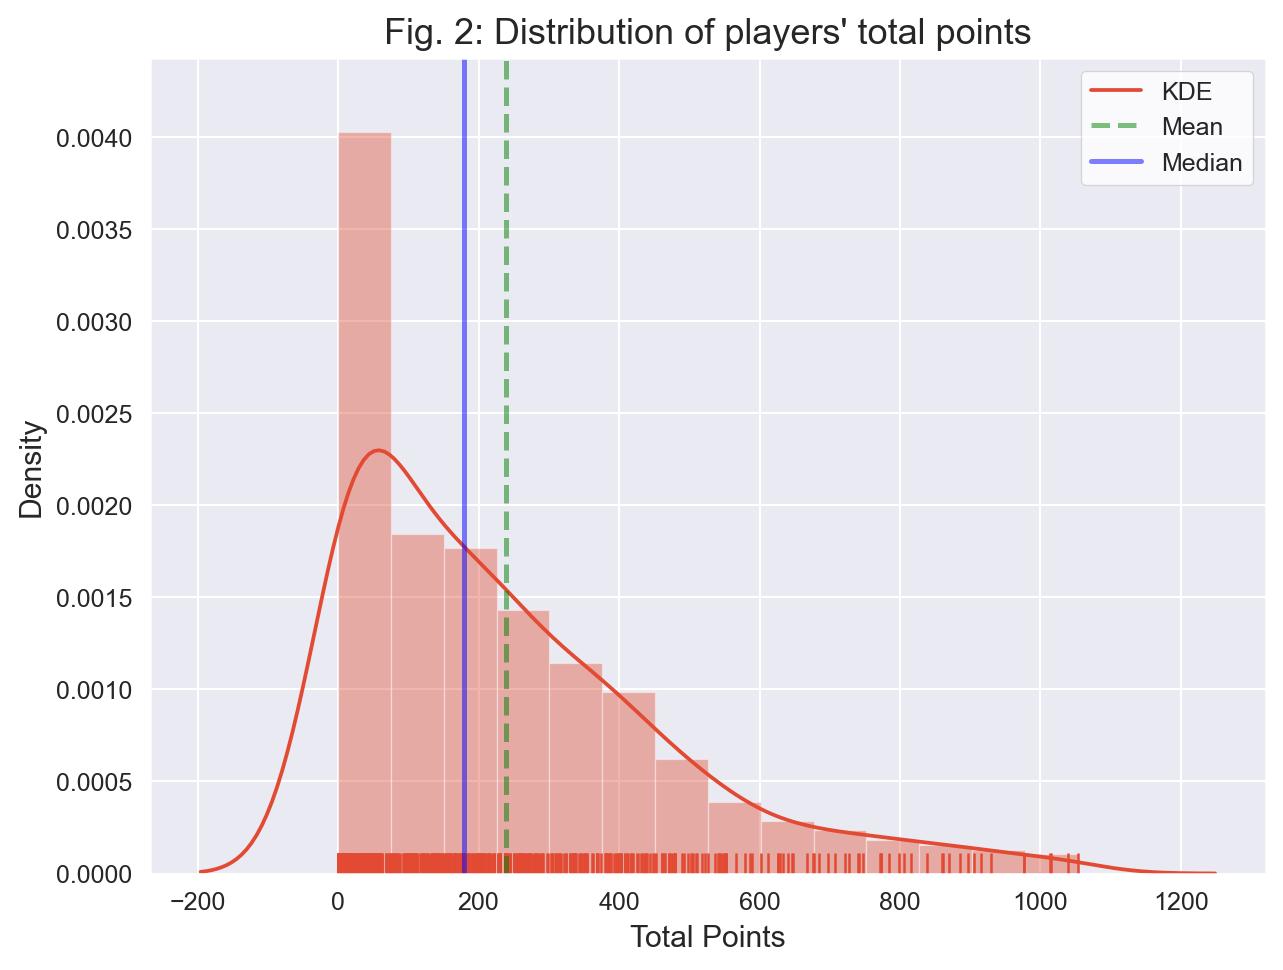

In [30]:
import seaborn as sns

sns.set_style("darkgrid")

sns.distplot(NBA["PTS"], 
             kde=True, 
             rug=True).set(title="Fig. 2: Distribution of players' total points", 
                           xlabel = "Total Points")

plt.axvline(x=NBA["PTS"].mean(), 
            linewidth=2, 
            color="g", 
            label="mean", 
            alpha=0.5, 
            linestyle="--")

plt.axvline(x=NBA["PTS"].median(), 
            linewidth=2, 
            color="b", 
            label="median", 
            alpha=0.5)

plt.legend(["KDE","_nolegend_","Mean","Median"], facecolor="white")
plt.savefig("plots/dist_PTS.png")

It can be inferred that the normal distribution is positively or right-skewed. So, the mean of total points (green dashed line) is greater than the median or peak (blue solid line). Most of the total points fall on the right side of the peak, i.e., greater than $200$. One of the possible reasons for this right-skewness is a lower boundary in the dataset. In other words, for the total points data, the lower bounds are extremely low relative to the rest of the observations.

Now, the total points data is grouped by player name and grand total points is calculated for each of the players irrespective of any multiple teams they played in. This data is then sorted in descending order of total points to find the top $5$ players in points leaderboard.

In [31]:
# grouping as few players appearing more than once
grouped_NBA = NBA.groupby('Player')['PTS'].sum().reset_index()

# descending sort for top 5 players with most pts.
top5_NBA = grouped_NBA.sort_values(by = ['PTS'], ascending=False).head()
top5_NBA

,Player,PTS
208,James Harden,1568
37,Bradley Beal,1053
426,Stephen Curry,1039
164,Giannis Antetokounmpo,1015
84,Damian Lillard,1013


Next, to analyze the composition of these top $5$ total points, a left join is done on the original dataset to get the team-wise point details. On plotting a scatterplot for these total points versus the players, it can be observed that James Harden tops the list by a huge margin as he has combined scored points ($1568$ points) from playing in three different teams: **TOT**, **HOU** and **BRK**, with scoring the maximum in **TOT** ($784$ points). Whereas the other four players have only played in one team each.

In [32]:
points_tab = pd.merge(top5_NBA,
                      NBA,
                      how='left',
                      on='Player')[['Player','Tm','2P','3P','FT','PTS_x','PTS_y']]
points_tab

,Player,Tm,2P,3P,FT,PTS_x,PTS_y
0,James Harden,TOT,149,101,183,1568,784
1,James Harden,HOU,35,25,53,1568,198
2,James Harden,BRK,114,76,130,1568,586
3,Bradley Beal,WAS,294,74,243,1053,1053
4,Stephen Curry,GSW,174,169,184,1039,1039
5,Giannis Antetokounmpo,MIL,329,39,240,1015,1015
6,Damian Lillard,POR,169,146,237,1013,1013


A bar chart for the above points table having top $5$ players is generated.

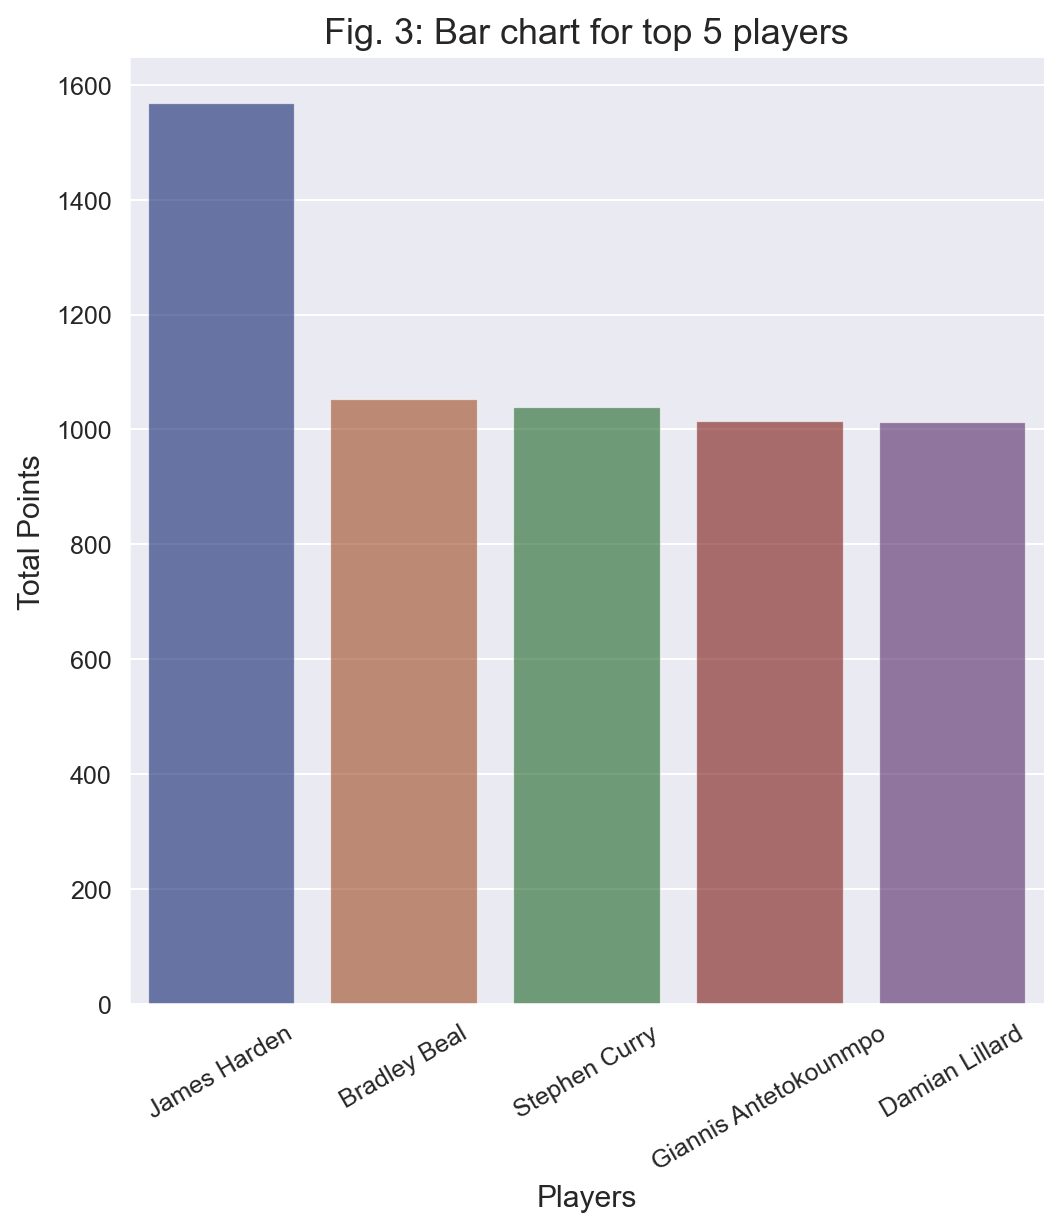

In [33]:
g = sns.catplot(
    data=points_tab, 
    kind="bar",
    x="Player", y="PTS_x",
    palette="dark", alpha=.6, height=6).set(title = "Fig. 3: Bar chart for top 5 players", 
                                            xlabel = "Players",
                                            ylabel = "Total Points")
g.set_xticklabels(rotation=30)
plt.savefig("plots/bar_top5.png")

To check the composition of the total points (**PTS**), a multiple linear regression is run on **3P**, **2P** and **FT** columns.

In [34]:
from sklearn.linear_model import LinearRegression

x = points_tab[['3P', '2P', 'FT']].to_numpy()
y = points_tab['PTS_y'].to_numpy()

model = LinearRegression().fit(x, y)
print(f"intercept: {model.intercept_} ,\ncoefficients: {model.coef_}")

intercept: 1.1368683772161603e-13 ,
coefficients: [3. 2. 1.]


From the results of coefficients, it can be confirmed that **PTS** is calculated using the following formula:

$$\text{Total Points}=3\times\text{3-Point Goals}+2\times\text{2-Point Goals}+1\times\text{Free Throws}$$

In [35]:
# check for composition of total points
points_tab['PTS_y'] == (3*points_tab['3P'] + 2*points_tab['2P'] + points_tab['FT'])

0    True
1    True
2    True
3    True
4    True
5    True
6    True
dtype: bool

### Check for 3P, 3PA and 3P% columns

By plotting histograms for **3P**, **3PA** and **3P%**, it can be seen that there are possible outliers in the data.

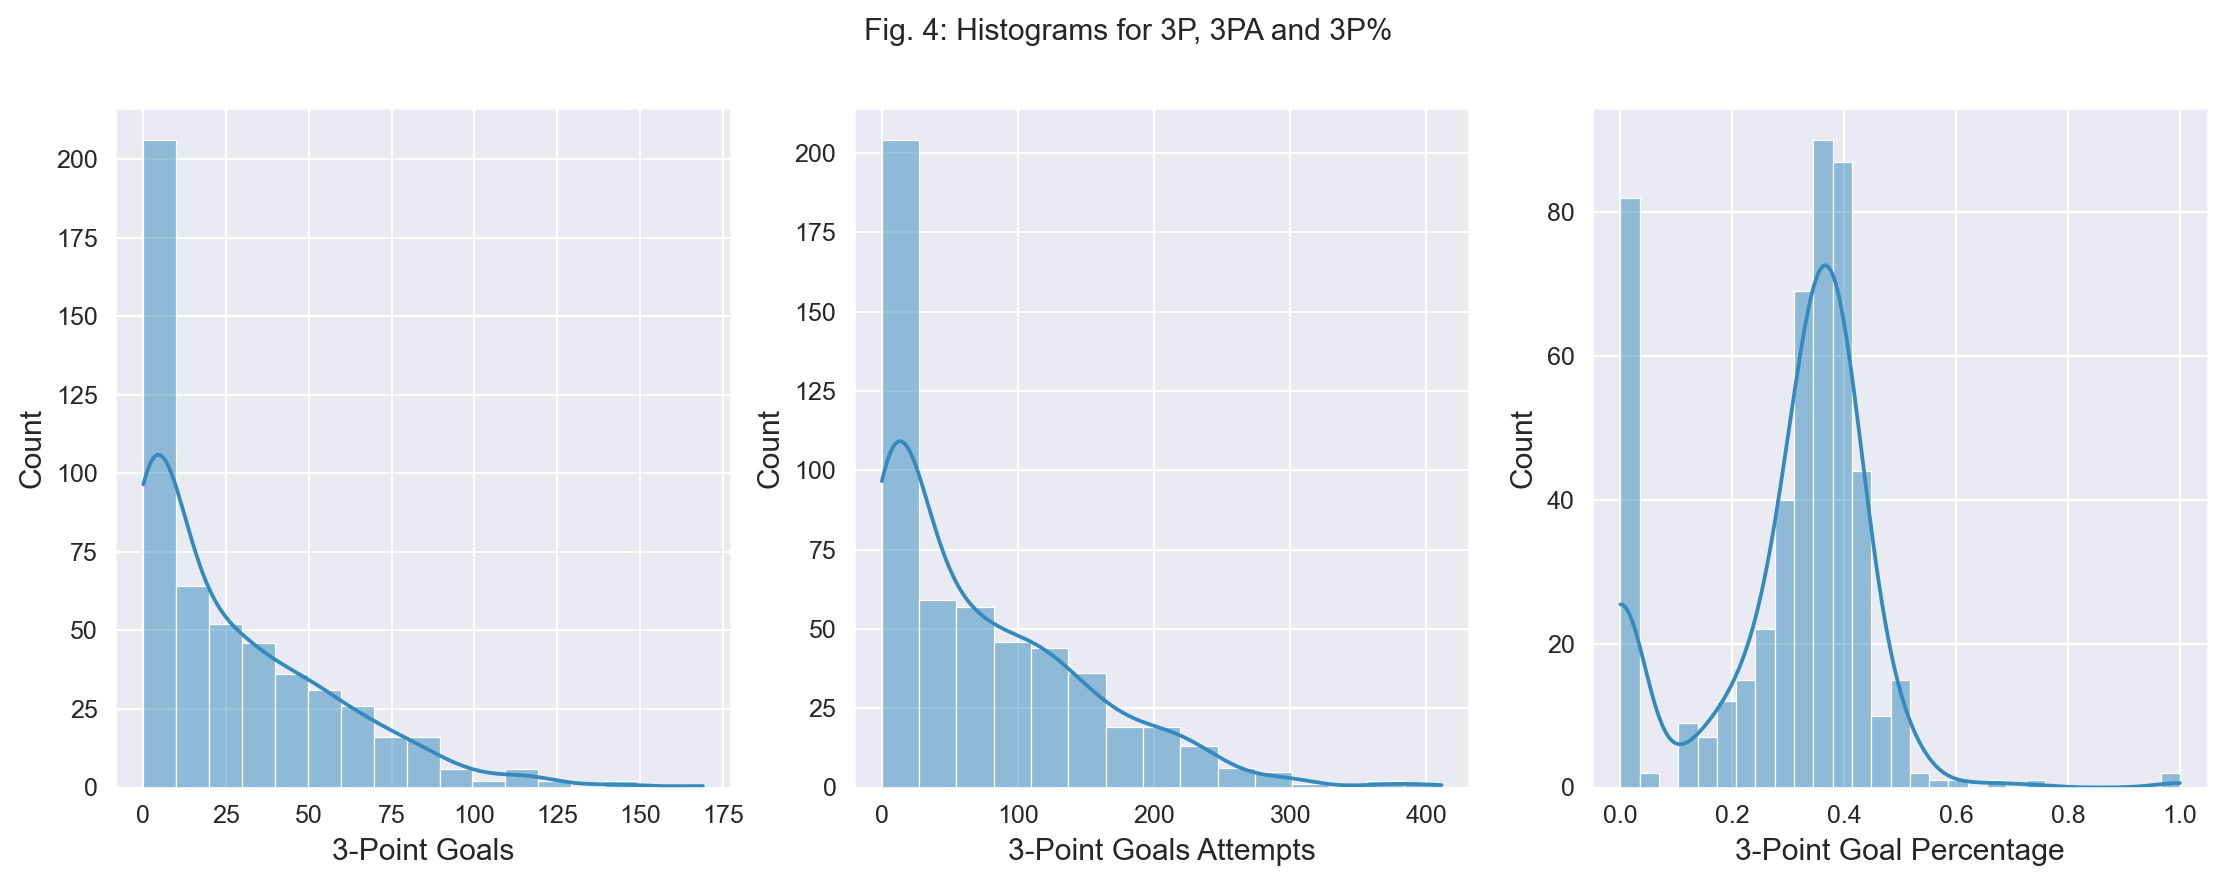

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Fig. 4: Histograms for 3P, 3PA and 3P%')

sns.histplot(ax=axes[0], data = NBA, x='3P', kde=True).set_xlabel('3-Point Goals')
sns.histplot(ax=axes[1], data = NBA, x='3PA', kde=True).set_xlabel('3-Point Goals Attempts')
sns.histplot(ax=axes[2], data = NBA, x='3P%', kde=True).set_xlabel('3-Point Goal Percentage')
plt.savefig("plots/hist_3Ps.png")

Upon further inspection of the outliers, it can be found that there are multiple zero values for all the three columns. This is the reason that the histogram plots are all left-skewed.

The player names for whom all the three columns contain zeros are filtered out.

In [37]:
# check outliers
outliers = NBA["Player"].loc[(NBA['3P']==0)&(NBA['3PA']==0)&(NBA['3P%']==0)]
outliers.count()

33

There are in total $33$ such observations for $31$ players as listed below :

In [38]:
outliers.value_counts()

Norvel Pelle            3
Precious Achiuwa        1
Cristiano Felício       1
Nick Richards           1
Vincent Poirier         1
Jakob Poeltl            1
Patrick McCaw           1
Enes Kanter             1
Damian Jones            1
Jaxson Hayes            1
Isaiah Hartenstein      1
Jalen Harris            1
Jared Harper            1
Ashton Hagans           1
Daniel Gafford          1
Tacko Fall              1
Jarrett Allen           1
Drew Eubanks            1
Devon Dotson            1
Ed Davis                1
Tyler Cook              1
Clint Capela            1
Devontae Cacok          1
Moses Brown             1
Ignas Brazdeikis        1
Brian Bowen             1
Marques Bolden          1
Tyler Bey               1
Udoka Azubuike          1
Kostas Antetokounmpo    1
Mitchell Robinson       1
Name: Player, dtype: int64

As the datasets are skewed, these zero values are replaced with corresponding column-wise medians as median is not affected by skewness. This is performed based on the assumption that the data collector has made entry errors in the mentioned three columns while collecting data.

In [39]:
# impute with median values
NBA_new = NBA.copy()
NBA_new.loc[outliers.index,"3P"] = NBA["3P"].median()
NBA_new.loc[outliers.index,"3PA"] = NBA["3PA"].median()
NBA_new.loc[outliers.index,"3P%"] = NBA["3P%"].median()

The new imputed dataset is named `NBA_new`.

In [40]:
NBA_new.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,17,50.5,0.344,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2.0,0.000,1,6,0.167,0,0,0.000,0,3,3,2,0,0,0,1,200
2,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,0,1.0,0.000,115,186,0.618,35,79,0.443,133,161,294,69,29,20,50,63,265
3,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,2,6.0,0.050,234,413,0.567,160,189,0.847,72,241,313,179,29,34,98,80,634
4,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75.0,0.360,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,288
5,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,0.000,0,1.0,0.000,0,2,0.000,0,0,0.000,0,1,1,1,0,0,0,1,0
6,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,0.408,30,98.0,0.306,56,113,0.496,28,35,0.800,5,61,66,54,28,9,32,44,230
7,Grayson Allen,SG,25,MEM,23,12,551,67,164,0.409,46,113.0,0.407,21,51,0.412,34,38,0.895,8,57,65,50,23,3,21,30,214
8,Jarrett Allen,C,22,TOT,35,17,977,172,257,0.669,4,8.0,0.050,168,249,0.675,123,166,0.741,111,235,346,60,16,59,54,55,471
9,Jarrett Allen,C,22,BRK,12,5,320,44,65,0.677,17,50.5,0.344,44,65,0.677,46,61,0.754,38,87,125,20,7,19,22,21,134


### Analysis of Total Points vs other features

Boxplot of total points by players’ positions reveals that positions **PG** and **SG** have the highest median total points. There are only one observation each for **PG-SG** and **SF-PF** positions. The **PG** position has the maximum variability of total points.

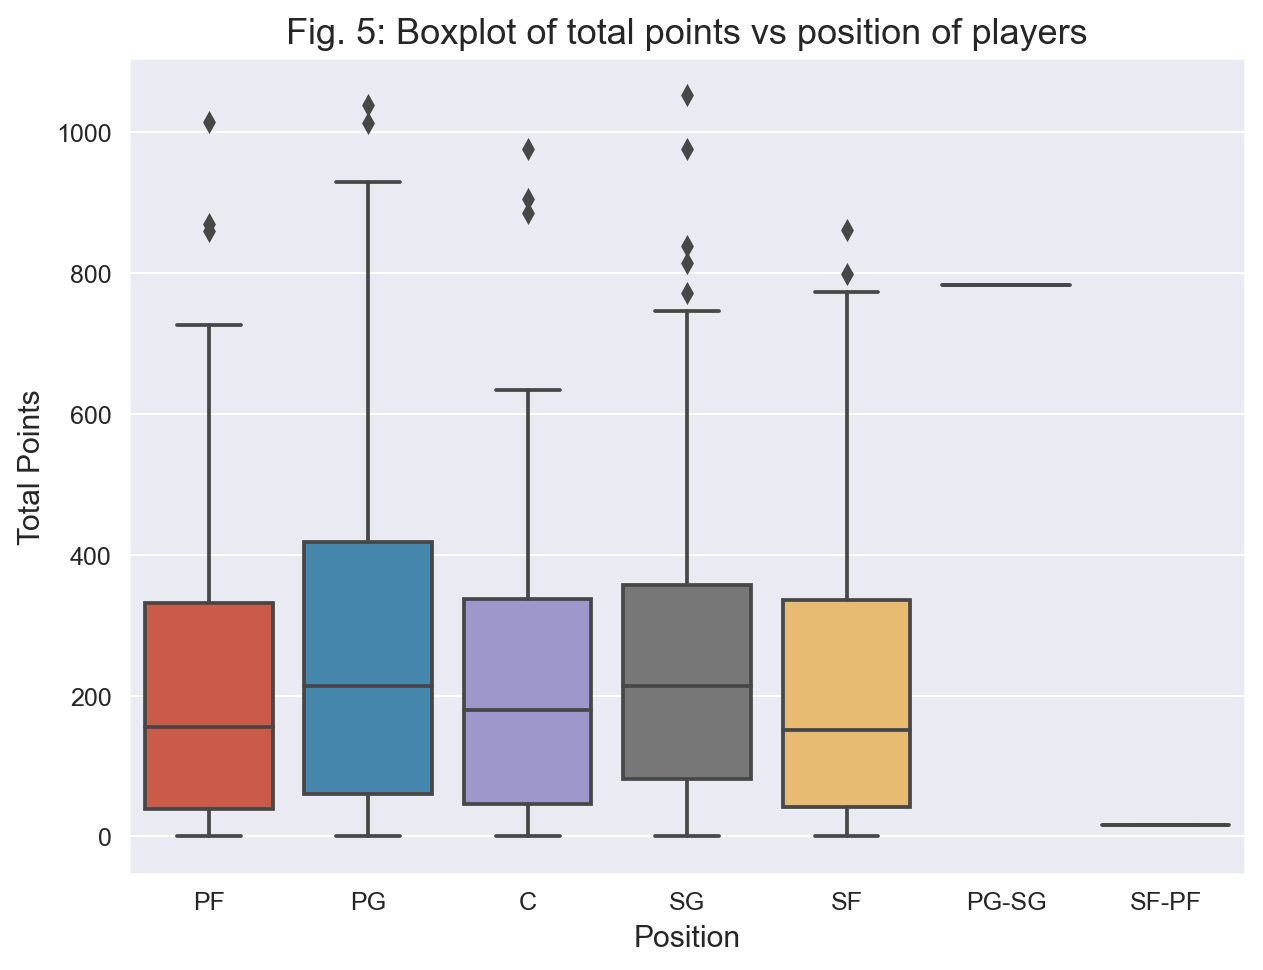

In [41]:
sns.boxplot(x='Pos',
            y='PTS',
            data=NBA).set(title='Fig. 5: Boxplot of total points vs position of players', 
                                          xlabel="Position",
                                          ylabel="Total Points")
plt.savefig("plots/box_PTS_pos.png")

Scatterplot of total points vs the total rebounds by players’ positions depicts a positive relationship. With increase in number of rebounds, total points also seem to increase for the players for all positions. Notably, players playing in position **PG** and **SG** seem to have the strongest positive relationship. Whereas players in position **C** seem to have the weakest relationship.

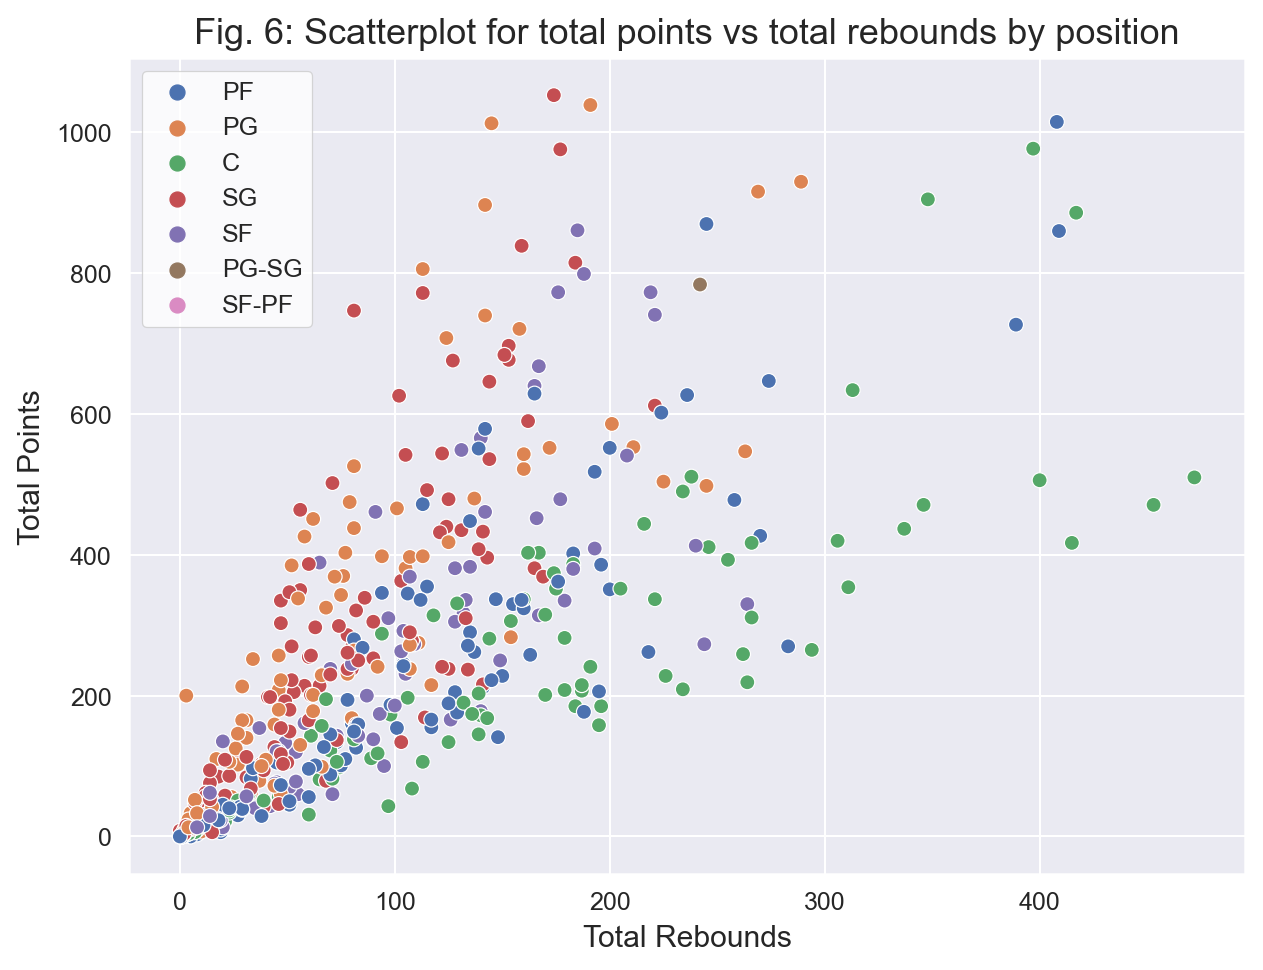

In [42]:
sns.scatterplot(data = NBA,
                x = 'TRB',
                y = 'PTS',
                hue = 'Pos',
                palette = "deep").set(title = 'Fig. 6: Scatterplot for total points vs total rebounds by position',
                                      xlabel = "Total Rebounds",
                                      ylabel = "Total Points")
plt.legend(facecolor = "white")
plt.savefig("plots/scatter_PTS_TRB.png")

From the scatterplot of total points vs minutes played by personal goals made, it can be inferred clearly that the total points have a strong position correlation with minutes played. Also, interestingly, the number of personal fouls seem to have an increasing trend with increase in minutes played by the players.

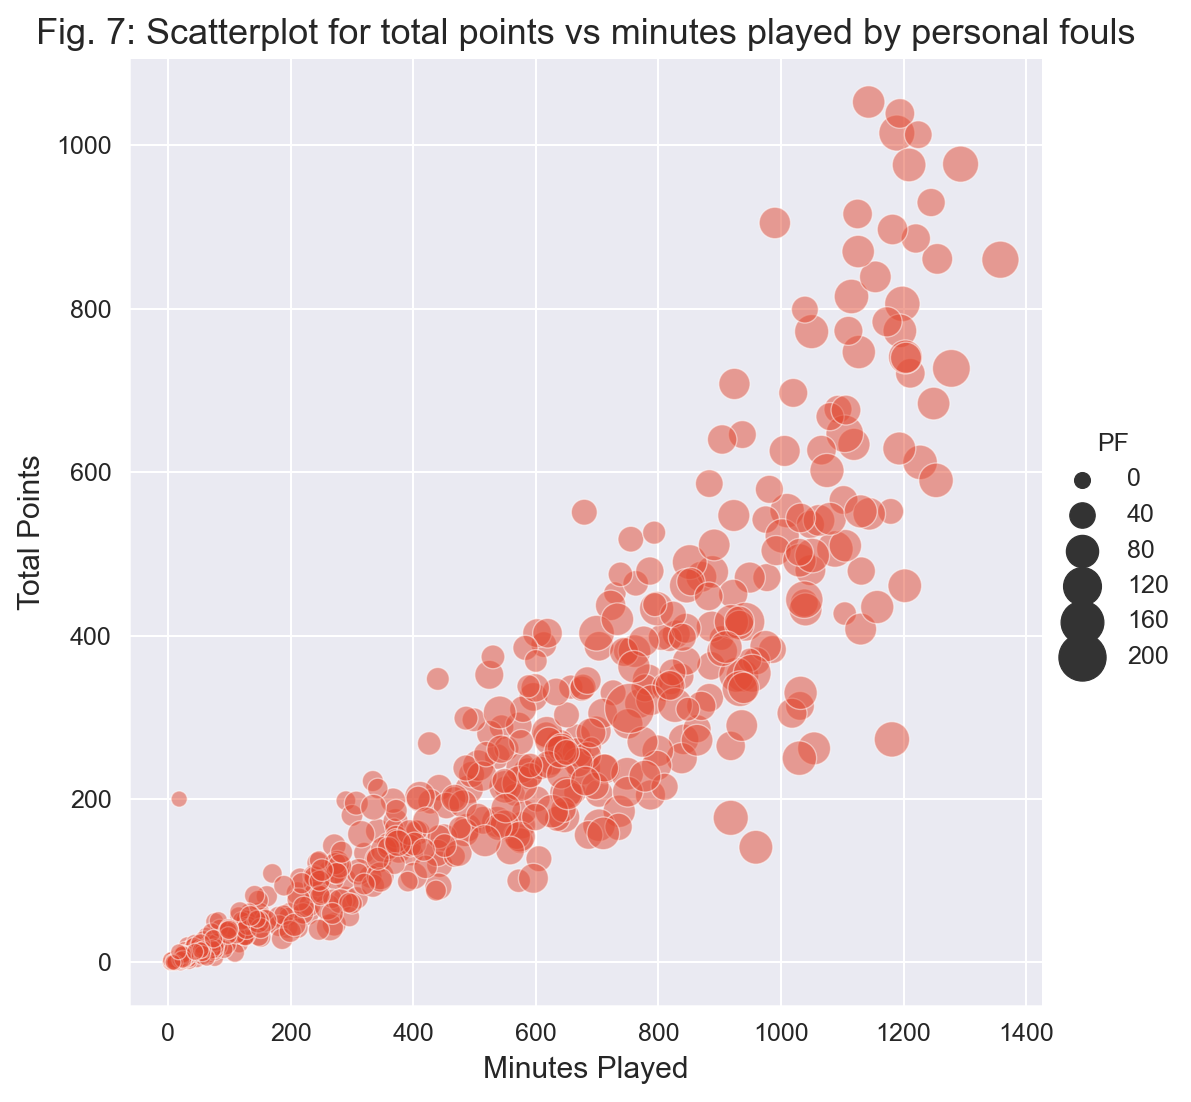

In [43]:
sns.relplot(x="MP", 
            y="PTS", 
            size="PF",
            sizes=(40, 400), 
            alpha=.5, 
            palette="deep",
            height=6,
            data=NBA).set(title='Fig. 7: Scatterplot for total points vs minutes played by personal fouls',
                          xlabel = "Minutes Played", ylabel = "Total Points")
plt.savefig("plots/scatter_TPS_MP_PF.png")

Scatterplot for total points versus block made reveals that with a small increase in blocks, there is a rapid increase in total points, i.e., there is a strong correlation between the two. However, players having very high number of blocks ($>50$) seem to have lower total points in comparison to players who made lesser number of blocks.

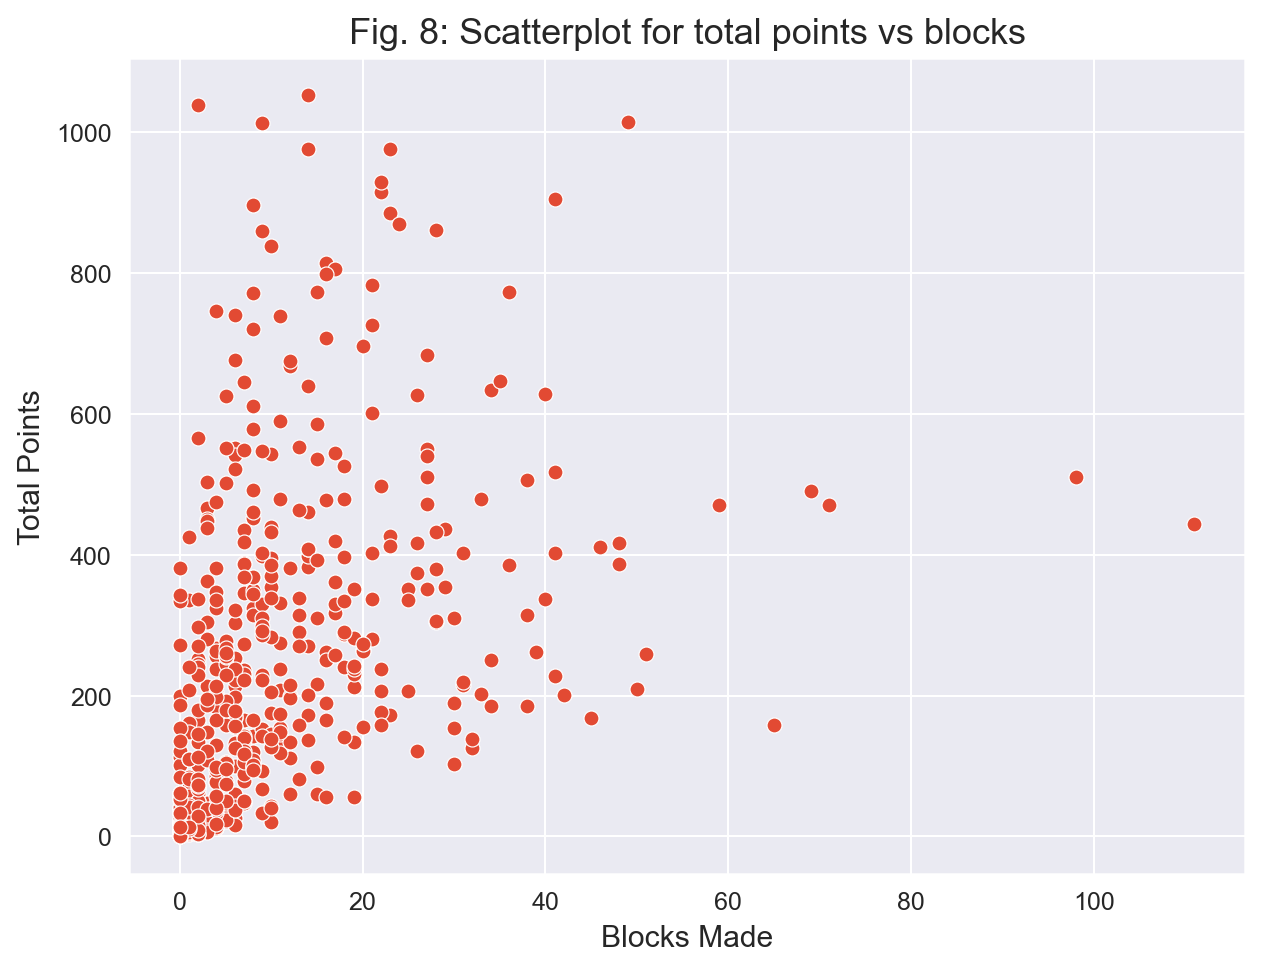

In [44]:
sns.scatterplot(x="BLK", 
                y="PTS",
                palette="muted",
                data=NBA).set(title='Fig. 8: Scatterplot for total points vs blocks',
                              xlabel = "Blocks Made", 
                              ylabel = "Total Points")
plt.savefig("plots/scatter_TPS_BLK.png")

---

## References

- Aksakalli, V., Yenice, Z., Wong, Y., Ture, I., & Malekipirbazari, M. (2021). Data Preparation for Machine
Learning | www.featureranking.com. Retrieved 20 April 2021, from
https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-
learning/


- Boschetti, A., & Massaron, L. (2018). _Python Data Science Essentials_ (3rd ed.). Packt Publishing.


- Haider, M. (2015). _Getting Started with Data Science: Making Sense of Data with Analytics_ (1st ed.). IBM
Press.


- Muniz, H. (2017). Right-Skewed Distribution: What Does It Mean?. Retrieved 20 April 2021, from
https://blog.prepscholar.com/skewed-right